<a href="https://colab.research.google.com/github/MaiteVillalon/ADA-informes/blob/main/orden_topologico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Descripción del problema**

##**Problema de ordenamiento topológico**
**Entrada**: Grafo dirigido sin ciclos $G=(V,E)$.

**Salida:** Un orden topológico de los vértices de $G$. Es decir, una asignación $f(v)$ a cada vértice $v\in V$, tal que para cada arco $(v,w)\in E$, se cumple que $f(v)<f(w)$.



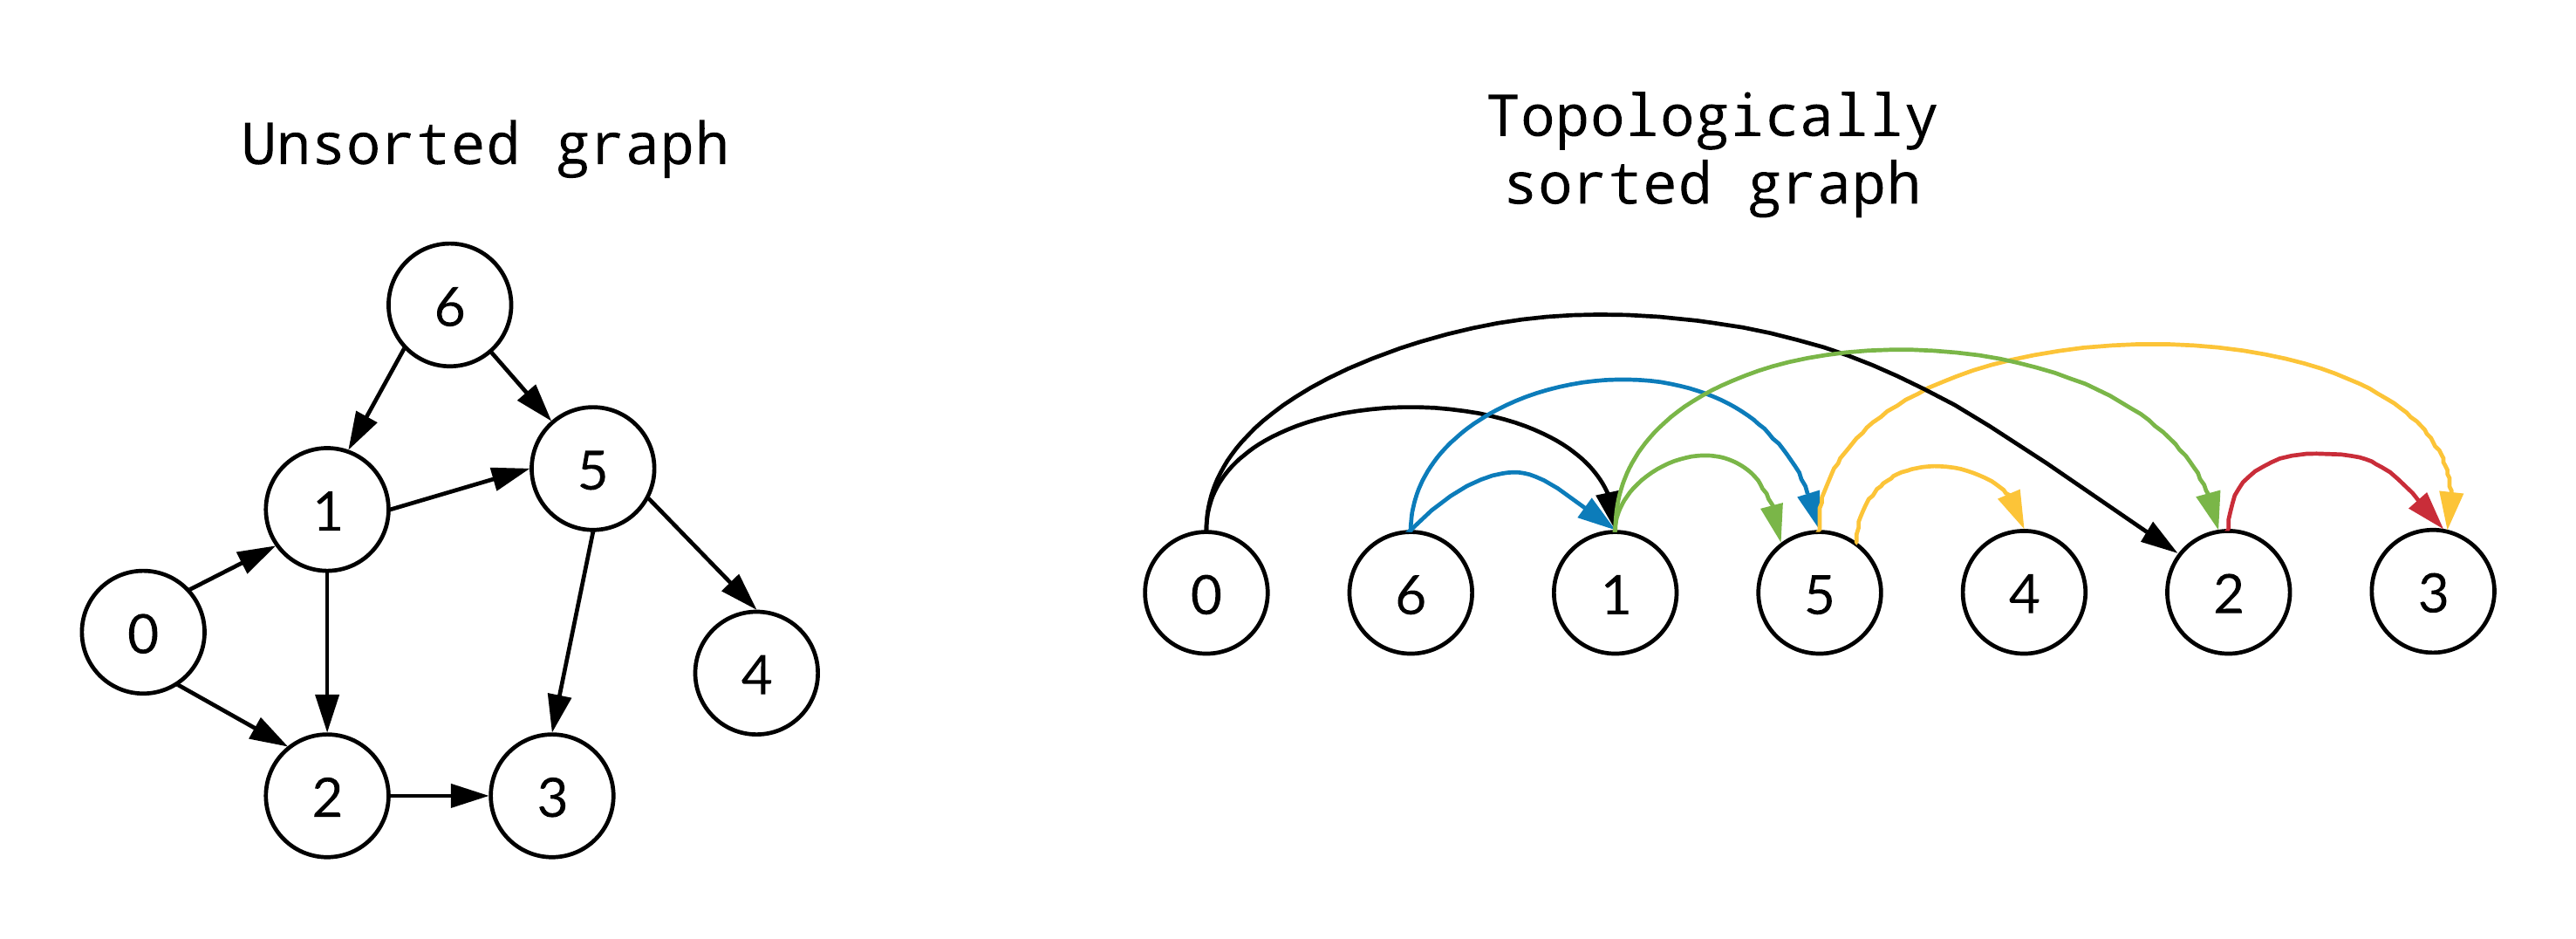
Una ordenación topológica de un grafo acíclico dirigido G es una ordenación lineal de todos los nodos de G que satisface que si G contiene la arista dirigida uv entonces el nodo u aparece antes del nodo v. La condición que el grafo no contenga ciclos es importante, ya que no se puede obtener ordenación topológica de grafos que contengan ciclos. 
$G$ debe ser un grafo dirigido donde se le asigna $f(v)$ a cada vértice $v\in V$.

Para cada arco $(v,w)\in E$, se cumple que $f(v)< f()$.

El problema conciste en encontrar una secuencia para realizar tareas de cierta forma que las restricciones que existan con anterioridad sean respetadas.
Por ejemplo la malla curricular de una carrera, donde debemos respetar el orden para cursar los ramos. 



##**Descripción del algoritmo**

El algoritmo de orden topológico realiza varias búsquedas en profundida a partir de nodos no explorados, en cada búsqueda realiza un recorrido post-orden, cada vez que se visita un nodo se etiqueta con un contador decreciente que es inicializado con el total de nodos.

Para que funcione correctamente el algoritmo Debemos tener un grafo dirigido sin ciclos(DAG).

**Pasos más importantes**:

1.   Crear una pila para almacenar los nodos
2.   Llamamos el DFS de manera recursiva o no recursiva a partir de un nodo no explorado.

3. Se recorren todos los nodos  y se almacenan en la pila anteriormente creada.   
4.   Una vez recorrido todos los nodos se retorna la pila, la cual contiene el orden topológico.

###**Ejemplo**
Se tiene el siguiente gráfo dirigido sin ciclos.

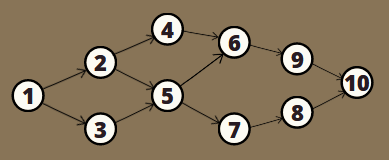


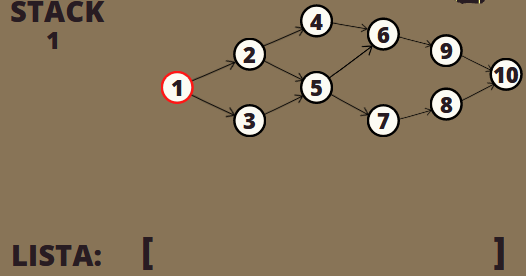



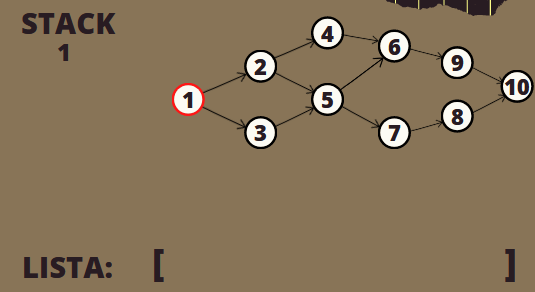

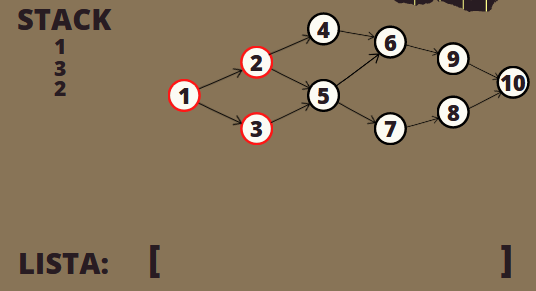

Iteramos así hasta encontrarnos con un nodo que tenga una lista de nodos adyacentes vacía.

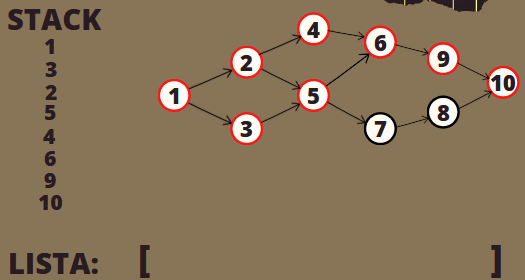

Visitamos los nodos en post orden y guardamos en el arreglo ordenado.

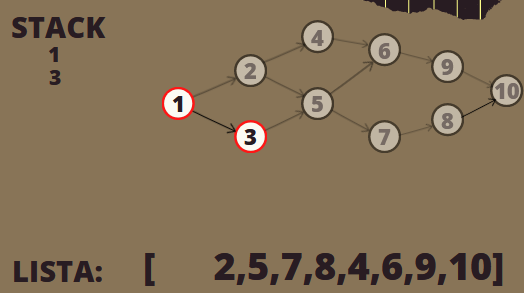


Despues de recorrer todos los nodos obteenemos el sigueinte orden topológico [13257846910]

###**Funciones auxiliares (Profesor Ignacio)**

In [ ]:
from collections import defaultdict
import math
import random

# Crea un grafo sin ciclos de nodos de 0 a V - 1
# Retorna un dicionario [defaultdict(list)] 
# de key valor del nodo (0 a V - 1) y de value una 
# lista con los nodos a los cuales se conecta
def graph_instance_creator(V):
  nodes = random.sample(range(0, V), V)
  div = int(math.ceil(V / 4))

  current_div = div
  graph = defaultdict(list)
  for i in reversed(range(len(nodes))):
    selectables = []
    if (len(nodes) - current_div <= 0):
      selectables = random.sample(nodes, random.randint(1, len(nodes)))
    else:
      population = nodes[:len(nodes)-current_div]
      end = len(population) if len(population) < 4 else 4
      selectables = random.sample(population, random.randint(1, end))
    for selectable in selectables:
      if (nodes[i] != selectable and not selectable in graph[nodes[i]]):
        graph[nodes[i]].append(selectable)
    if (i < len(nodes) - current_div):
      current_div += div

  return graph
V = 5
grafo = graph_instance_creator(V)
print(grafo)
t = len(grafo)
print(t)

defaultdict(<class 'list'>, {2: [0, 3, 1], 4: [0, 1], 1: [3]})
3


In [ ]:
from collections import defaultdict
import networkx as nx

# Recibe un grafo de tipo [defaultdict(list)]
# Retorna un nx.DiGraph de la libreria networkx
def graph_to_nxdigraph(graph):
  nxdigraph = nx.DiGraph()
  for i in graph.keys():
    nxdigraph.add_node(i)
    for v in graph[i]:
      nxdigraph.add_edge(i, v)
  return nxdigraph

graph_to_nxdigraph(grafo)

DFS iterativo

In [ ]:
def topologicalSort_Iterativo(arbol, verbose=False):
  state = dict()
  for n in arbol: state[n] = False

  Laux = [] #Lista auxiliar guarda el orden
  for n in arbol:
    stack=[n]
    while len(stack)>0:
      n = stack.pop()
      if state[n] == False:
        state[n] = True


        stack.append(n)
        for adj in reversed(list(arbol[n])):
          if state[adj] == False: 
            stack.append(adj)

      elif state[n] == True:
        state[n] = True
        Laux.append(n)


  #Damos vuelta la lista auxiliar
  Laux = list(reversed(Laux))

  return Laux


g = graph_instance_creator(10)
arbol =graph_to_nxdigraph(g)
verbose=False

lista = topologicalSort_Iterativo(arbol,verbose)

print (lista)

[9, 1, 8, 7, 3, 7, 6, 2, 4, 5, 0, 6, 2, 4, 5, 6, 1, 2, 6, 4]


###**DFS implementacion recursiva**

In [ ]:
def DFS_recursivo(G, initial, cont, sorted, verbose=False):
  G.nodes[initial]['state'] = 1 # Se etiqueta el nodo como "explorado"

  # Obtenemos la lista con los nodos adyacentes
  adj_list = list(reversed(list(G[initial])))


  for adj in adj_list: # Se recorren todos los nodos adyacentes
    if G.nodes[adj]['state'] == 0: # Si el nodo no ha sido descubierto
      if verbose:
        print("Llamando recursivamente a DFS con nodo inicial ", end='')
        print(colored(G.nodes[adj]['symbol'], 'blue'))

      # Llamamos recursivamente a DFS con cada nodo adyacente no explorado
      cont, sorted = DFS_recursivo(G, adj, cont, sorted, verbose)

  G.nodes[initial]['order'] = cont # Etiquetamos el nodo con su orden de visita
  G.nodes[initial]['state'] = 2 # Marcamos el nodo como visitado
  sorted.append(int_to_alpha(initial)) # Insertamos el nodo a la lista ordenada

  cont -= 1 # Disminuimos el contador en 1

  # Retornamos la lista ordenada de nodos y el contador actual
  return cont, sorted


In [ ]:


import networkx as nx
import matplotlib.pyplot as plt

def graph_to_nxdigraph(graph):
  nxdigraph = nx.DiGraph()

  for i in graph.keys():
    nxdigraph.add_node(i, symbol=None, order=None, state=0)
    for v in graph[i]:
      nxdigraph.add_node(v, symbol=None, order=None, state=0)
      nxdigraph.add_edge(i, v)

  for n in nxdigraph.nodes():
    nxdigraph.nodes[n]['symbol'] = int_to_alpha(n)

  return nxdigraph

def draw_graph(G):
  labels = dict()

  for i in G.nodes():
    labels[i] = G.nodes[i]['symbol'] + '\n' + str(G.nodes[i]['order'])

  pos = nx.spring_layout(G,k=10,seed=1)
  nx.draw(G, pos, with_labels=True, labels=labels, font_size=10,
          node_size=1000, node_color='white', edgecolors='black')
  plt.show()
  plt.close()

def int_to_alpha(n):
  return chr(ord('a') + n)



Orden topológico: ['j', 'e', 'c', 'g', 'b', 'd', 'i', 'a', 'f', 'h']


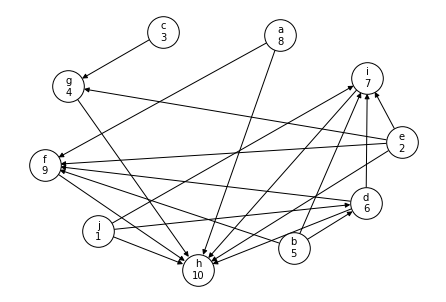

In [ ]:

def topological_sort_recursivo(G, visualize=False, verbose=False):
  cont = len(G.nodes())
  sorted = list()

  for n in G.nodes(): # Recorremos los nodos del árbol
    if G.nodes[n]['state'] == 0: # Si el nodo no ha sido explorado


      # Aplicamos DFS con cada nodo no explorado
      cont, sorted = DFS_recursivo(G, n, cont, sorted, verbose)

  sorted.reverse() # Invertimos la lista para mostrar los nodos de menor a mayor
  
  if verbose or visualize:
    print(f"Orden topológico: {sorted}")
    draw_graph(G)

  return sorted # Retornamos la lista con el orden topológico

graph = {
    0: [5,7],
    1: [3,8,5],
    2: [6],
    3: [5,7,8],
    4: [6,8,7,5],
    5: [7],
    6: [7],
    8: [7],
    9: [7,3,8]
}

G = graph_to_nxdigraph(graph)
sorted = topological_sort_recursivo(G, True)




##**Correctitud**

###**Teorema Correctitud del Algoritmo**

"*El algoritmo de ordenamiento topológico entrega un correcto orden topológico para un gráfo de n nodos*"

###**Prueba del teorema**
Probaremos el teorema anterior utilizando inducción.

**Hipotesis inductiva:**  Para cada nodo $(u,v)$, se cumplirá que $f(u)<f(v)$

**Prueba de la hipótesis inductiva**

Caso base: Nuestro caso es cuando el gráfo solo tiene un nodo, al no existir arcos trivialmente asumimos que se cumple la propiedad.

Caso inductivo: Para el caso inductivo $n>1$ debemos analizar la función **DFS**.

El algoritmo comenzará por un nodo no explorado. Este se guardará en la pila que se creó en un comienzo, justo con sus respectivos nodos adyacentes, los cuales tambien fueron etiquetados como **explorados** y asi con el siguiente nodo.

Cuando nos encontremos con un nodo con 0 nodos adyacentes se etiquetará como explorado y se disminuira en 1 el contador que se inicializo con el total de nodos ingresados. Para el siguiente nodo podrian ocurrir **dos casos**.

El siguiente nodo es un **hermano de x** (último nodo visitado). Para este nodo, se llama recursivamente a DFS. Asumimos trivialmente por induccion que se cumple la propiedad.

El siguiente nodo corresponde al **padre de x**. Sabemos que el contador tendrá un valor menor a $f(x)$. Esto implica que el valor asignado al padre también será menor, cumpliéndose así la hipotesis inductiva.

##**Tiempo de ejecución**

Este algoritmo tiene una complejidad de O(V+E) donde V representa la cantidad de nodos y e representa los vértices.

**Demostración**

Este tiempo de ejecución se consigue analizando el código.

En la primera parte se crea una pila para almacenar cada nodo, eso tiene un costo de O(v) por causa de que lo guarda solo una vez.

También tenemos que recorrer cada nodo que tiene un costo O(e) por causa de que pasamos solo una vez por sus conexiones(arcos).

Al hacer una simple suma podemos demostrar que tiene una complejidad de O(V+E).